QUESTION 1

In [1]:
%%capture --no-stderr

%pip install --quiet numpy matplotlib scikit-image

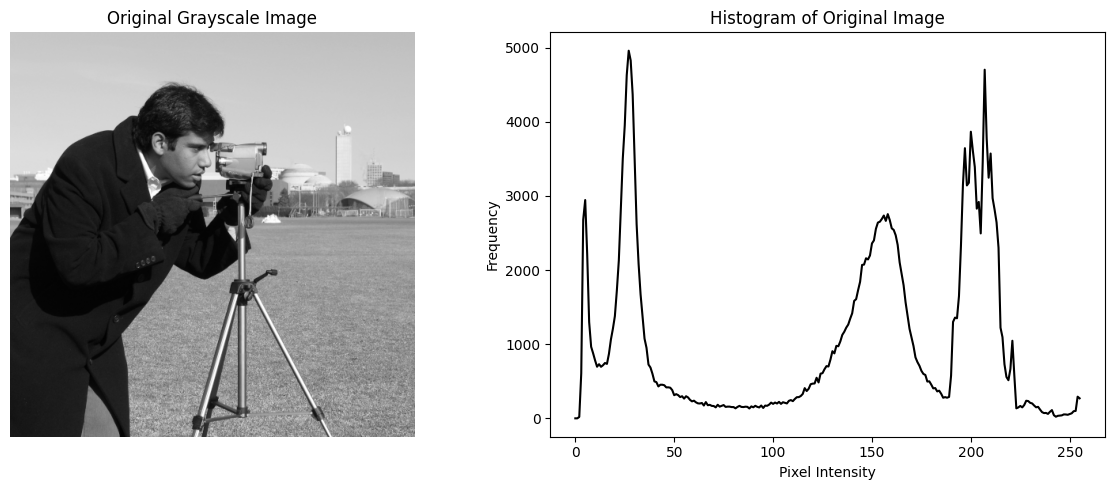

In [ ]:
#(i)Load a sample grayscale image in a Jupyter Notebook and analyze its histogram. Display both the image and its histogram side by side.

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

# Load a sample grayscale image (the "camera" image)
image = data.camera()

# Compute the histogram
hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

# Display image and histogram side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].plot(bins[:-1], hist, color='black')
axes[1].set_title('Histogram of Original Image')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


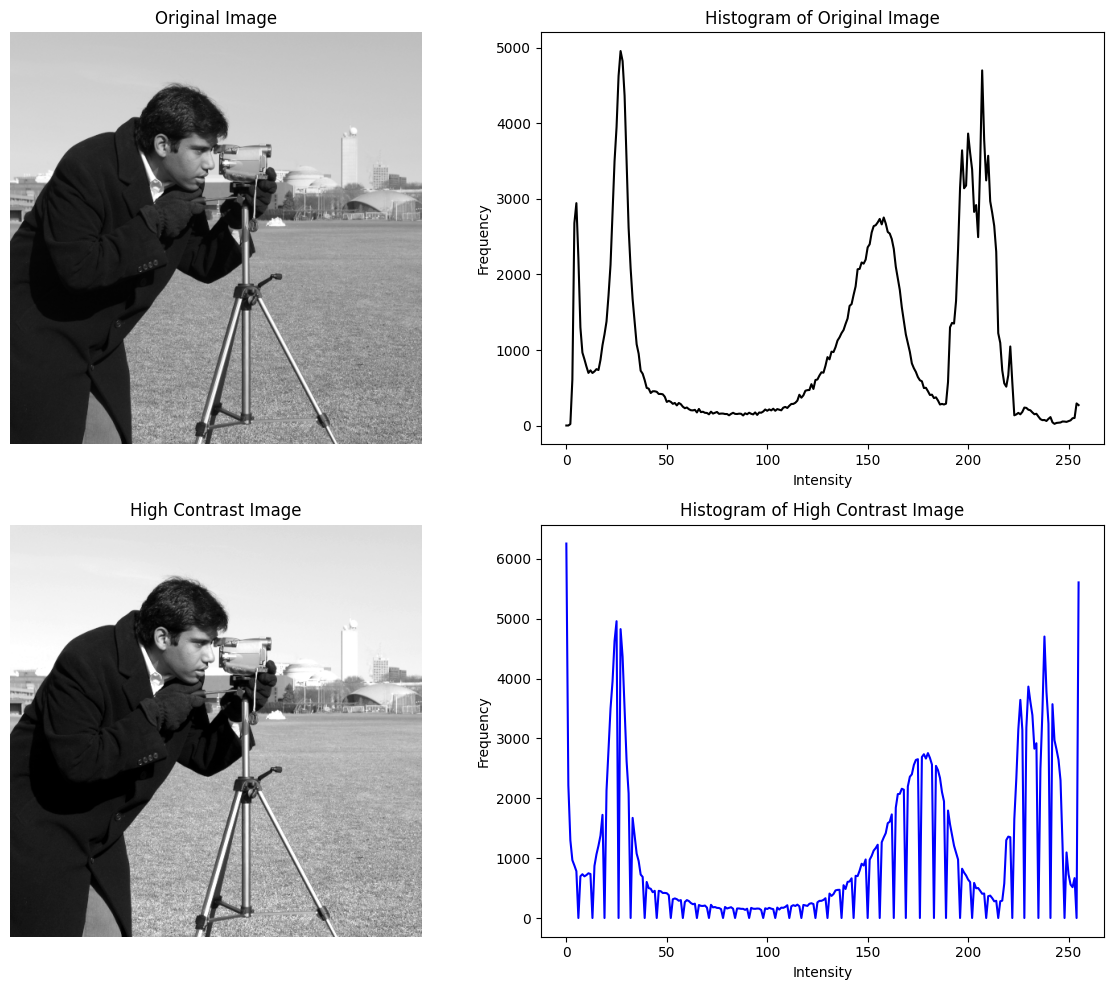

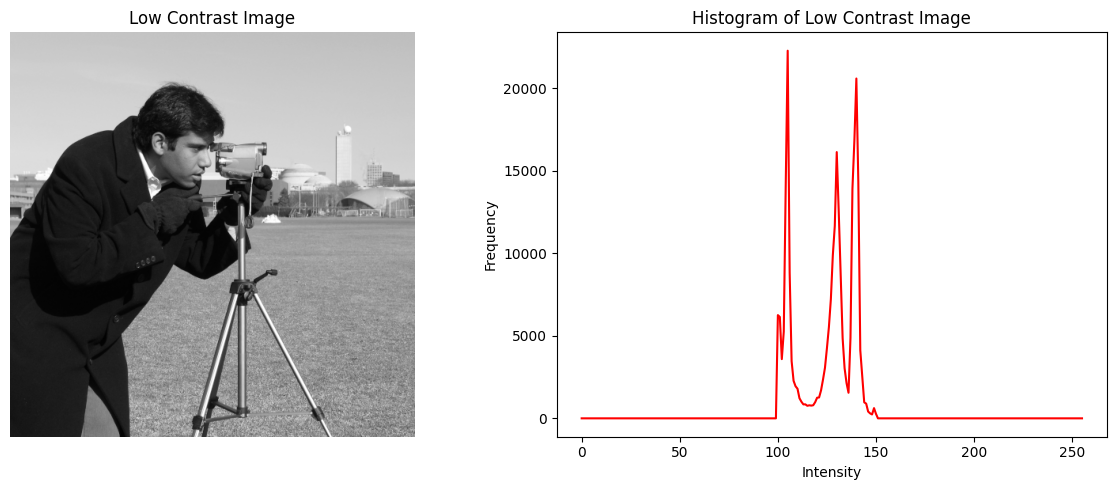

In [2]:
# (ii) Modify the contrast of the image (increase and decrease it) and generate the histograms for each version. Compare the histograms and explain your observations.

# Increase contrast using contrast stretching
p2, p98 = np.percentile(image, (2, 98))
image_high_contrast = exposure.rescale_intensity(image, in_range=(p2, p98))

# Decrease contrast by compressing the intensity range e.g. by mapping the intensities to a smaller range
image_low_contrast = exposure.rescale_intensity(image, in_range=(0, 255), out_range=(100, 150))

# Compute histograms for the modified images
hist_high, bins_high = np.histogram(image_high_contrast.flatten(), bins=256, range=[0,256])
hist_low, bins_low = np.histogram(image_low_contrast.flatten(), bins=256, range=[0,256])

# Display images and histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image and histogram for reference
axes[0,0].imshow(image, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')
axes[0,1].plot(bins[:-1], hist, color='black')
axes[0,1].set_title('Histogram of Original Image')
axes[0,1].set_xlabel('Intensity')
axes[0,1].set_ylabel('Frequency')

# High contrast image and its histogram
axes[1,0].imshow(image_high_contrast, cmap='gray')
axes[1,0].set_title('High Contrast Image')
axes[1,0].axis('off')
axes[1,1].plot(bins_high[:-1], hist_high, color='blue')
axes[1,1].set_title('Histogram of High Contrast Image')
axes[1,1].set_xlabel('Intensity')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# For the low contrast image, we can plot separately:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image_low_contrast, cmap='gray')
axes[0].set_title('Low Contrast Image')
axes[0].axis('off')
axes[1].plot(bins_low[:-1], hist_low, color='red')
axes[1].set_title('Histogram of Low Contrast Image')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


OBSERVATIONS

High Contrast: The histogram of the high contrast image tends to be more “spread out” across the intensity range (i.e. a wider spread of pixel values) compared to the original one.

Low Contrast: The low contrast image’s histogram is compressed into a narrow band (in our example, between intensity values 100 and 150). The pixel values are concentrated over a smaller range, making the image appear “washed out” or flat.